In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import pandas as pd
import ShipDetection
from PIL import Image

2023-01-27 23:52:27.612793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 23:52:28.763916: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-01-27 23:52:28.764024: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-01-27 23:52:28.764032: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
dataDir = "data/airbus-ship-detection"

Checking train data image size

In [8]:
dim1 = []
dim2 = []
for imageFilename in glob.glob(dataDir+"/train_v2/*.jpg"):
    img = imread(imageFilename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

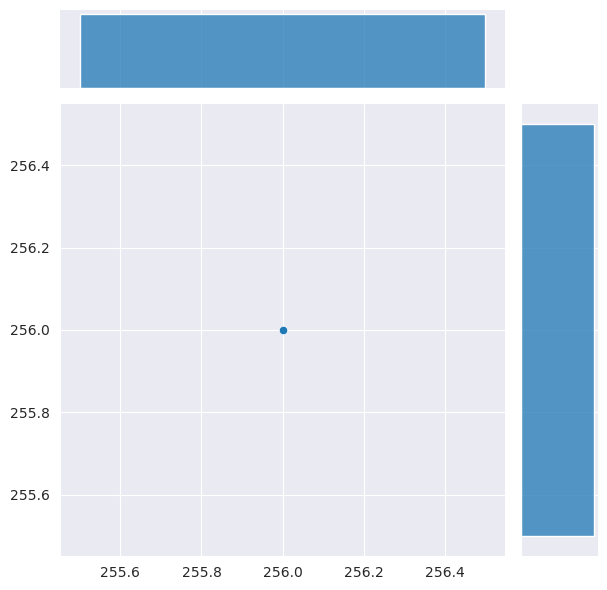

In [9]:
sns.jointplot(x=dim1,y=dim2)

In [10]:
np.mean(dim1)

256.0

Checking how training data looks like

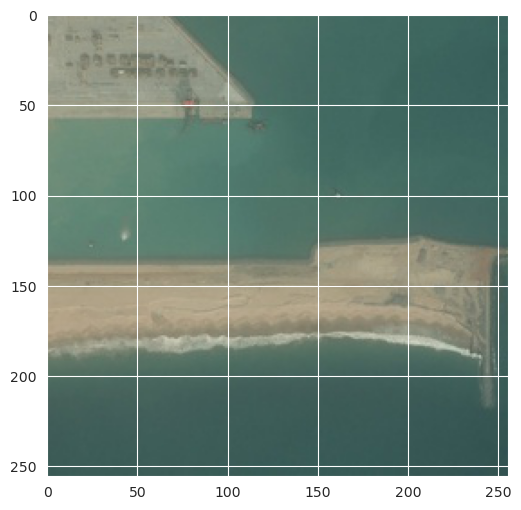

In [5]:
#img = imread(XtestDir+"/"+os.listdir(XtestDir)[8])
img = imread(dataDir+ "/train_v2/000194a2d.jpg")
plt.figure(figsize=(6,6))
plt.imshow(img)

Checking how mask data looks like

In [6]:
maskDf = pd.read_csv(dataDir+"/train_ship_segmentations_v2.csv")
maskDf.set_index("ImageId", inplace=True)
maskDf

,EncodedPixels
ImageId,
00003e153.jpg,NaN
0001124c7.jpg,NaN
000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...
000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
...,...
fffedbb6b.jpg,NaN
ffff2aa57.jpg,NaN
ffff6e525.jpg,NaN


In [7]:
im = maskDf.loc["000194a2d.jpg"]
im

,EncodedPixels
ImageId,
000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...
000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
000194a2d.jpg,198320 10 199088 10 199856 10 200624 10 201392...
000194a2d.jpg,55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
000194a2d.jpg,254389 9 255157 17 255925 17 256693 17 257461 ...


Deleting overwhelming amount of pictures without ships

In [39]:
withoutShipsDf = maskDf[maskDf["EncodedPixels"].isna()==True]

In [40]:
amountToDelete = len(maskDf)-2*maskDf["EncodedPixels"].count()

In [41]:
filesToDelete = withoutShipsDf[:amountToDelete]

In [42]:
for i in filesToDelete.index:
    os.remove(dataDir+"/train_v2/"+i)

In [43]:
for i in filesToDelete.index:
    try:
        maskDf.drop(index=i, inplace=True)
    except:
        continue

In [45]:
maskDf.to_csv("train_ship_segmentations_v2.csv",mode='w+')

Resizing train pictures from 768, 768 to 256, 256

In [46]:
for path in glob.glob(dataDir+"/train_v2/*.jpg"):
    foo = Image.open(path)
    foo = foo.resize((256,256),Image.ANTIALIAS)
    foo.save(path,quality=95)

/tmp/ipykernel_15695/3950442157.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  foo = foo.resize((256,256),Image.ANTIALIAS)


In [4]:
for path in glob.glob(dataDir+"/test_v2/*.jpg"):
    foo = Image.open(path)
    foo = foo.resize((256,256),Image.ANTIALIAS)
    foo.save(path,quality=95)

/tmp/ipykernel_10717/4048660203.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  foo = foo.resize((256,256),Image.ANTIALIAS)


Decoding/observing pictures with masks

In [12]:
import importlib
importlib.reload(ShipDetection)

<module 'ShipDetection' from '/home/caedes/Documents/programs/AirbusAhipDetectionTA-master/ShipDetection.py'>

In [13]:
decodedImage1 = ShipDetection.decode(maskDf.loc["0a9344301.jpg"])

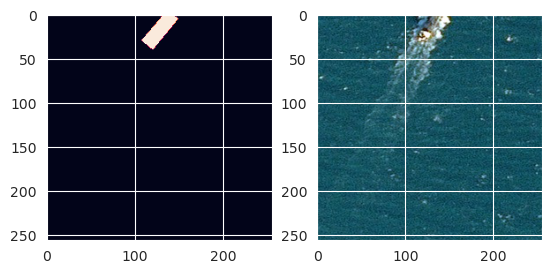

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2)
img = imread(dataDir+ "/train_v2/0a9344301.jpg")
ax1.imshow(decodedImage1)
ax2.imshow(img)